# Index - Social Inclusion


### 1) Importing the required packages

In [7]:
%run ./functions.ipynb

import pandas as pd
import numpy as np 
import pandas_datareader
from pandas_datareader import wb
from fancyimpute import KNN, SoftImpute, IterativeImputer, BiScaler, NuclearNormMinimization, IterativeSVD  
from sklearn import preprocessing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pmdarima as pm
import typing
import random
random.seed(2020)

### 2) Download the data

In [8]:
area = "Social_inclusion" #set the indicator area
area2 = "Social Inclusion" 

worldbank_data, tickers = load_the_database(area = area)

### 3) Area-specific data transformation

In [9]:
tickers_ = tickers[["Indicator ticker", "Transformation 1", "Transformation 2", "Scaling / Normalisation", "bounds", "symmetric value"]]

#inverse
inverse = tickers[tickers["Transformation 2"] == "inverse"]
inv = worldbank_data.columns[worldbank_data.columns.isin(inverse["Indicator ticker"])]
#worldbank_data[inv] = 1/(worldbank_data[inv] +0.02)
#worldbank_data[inv][worldbank_data > 50] = 50

worldbank_data[inv] = -worldbank_data[inv]


#bounded percentile
bounds_percentile = tickers[tickers["Scaling / Normalisation"] == "bounds_percentile"]
bounds = worldbank_data.columns[worldbank_data.columns.isin(bounds_percentile["Indicator ticker"])]

for col in bounds:
    percentiles = worldbank_data[col].groupby(level = 1).quantile([0.02,0.98]).values
    worldbank_data[col] = np.clip(worldbank_data[col], percentiles[0], percentiles[1])
    
#symmetric

symmetric = tickers[tickers["Scaling / Normalisation"] == "symmetric"]
sym = worldbank_data.columns[worldbank_data.columns.isin(symmetric["Indicator ticker"])]
worldbank_data[sym] = -(1 - worldbank_data[sym]).abs()

#symmetric2

symmetric = tickers[tickers["Scaling / Normalisation"] == "symmetric2"]
sym = worldbank_data.columns[worldbank_data.columns.isin(symmetric["Indicator ticker"])]
worldbank_data[sym] = -(50 - worldbank_data[sym]).abs()

## Check the correlations

In [10]:
import seaborn as sb

corr_matrix = worldbank_data.corr()


#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
               
sol[sol <0.80]

IT.CEL.SETS.P2  IT.NET.BBND.P2    0.583509
                FX.OWN.TOTL.ZS    0.534697
dtype: float64

In [11]:
worldbank_data_idx = worldbank_data.copy().reset_index()
worldbank_data_idx.replace([np.inf, -np.inf], np.nan, inplace = True)


### 4) Imputing the missing data


In [12]:
worldbank_data_filled = impute_missing()

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



### 5) Scaling and forecasting the data

In [13]:
worldbank_data_scaled = scale_and_forecast()

worldbank_data_scaled = worldbank_data_scaled.reset_index()
worldbank_data_scaled = worldbank_data_scaled.drop_duplicates(subset=['country', 'year'], keep='last')
worldbank_data_scaled.set_index(["country", "year"], inplace =True )
worldbank_data_scaled = worldbank_data_scaled.where(worldbank_data_scaled < 1, 1)

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. C

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed t

### 6) Build the index (mean, median, pca...)

In [14]:
#Taking the mean to build our indicator
worldbank_data_scaled["indicator"] = worldbank_data_scaled.mean(axis=1)

#IC1_ = IC1.set_index(["country", "year"])
#IC2_ = IC2.set_index(["country", "year"])

#IC1_["ic1"] = IC1_.mean(axis = 1)
#IC1_ = IC1_[["ic1"]]

#IC2_["ic2"] = IC2_.mean(axis = 1)
#IC2_ = IC2_[["ic2"]]


#worldbank_data_scaled_IC = worldbank_data_scaled.join(IC1_)
#worldbank_data_scaled_IC = worldbank_data_scaled_IC.join(IC2_)

#Or Median
#worldbank_data_scaled["indicator"] = worldbank_data_scaled.median(axis=1)

#Or it can be done by using PCA 

#from sklearn.decomposition import PCA
#pca = PCA(n_components = "mle")
#pca_fit = pca.fit_transform(worldbank_data_scaled)
#expvar = pca.explained_variance_ratio_[np.cumsum(pca.explained_variance_ratio_) < 0.90001]
#leng = len(expvar)
#pca_fit = pd.DataFrame(pca_fit).iloc[:, : leng]
#pca_fit = -pca_fit
#pca_fit = pca_fit*expvar
#indicator = pca_fit.sum(axis = 1)
#indicator = (indicator - indicator.min(axis=0)) / (indicator.max(axis=0) - indicator.min(axis=0))
#
#worldbank_data_scaled.reset_index(inplace = True)
#worldbank_data_scaled["indicator"] = indicator





worldbank_data_scaled.reset_index(inplace = True)
worldbank_data_scaled.year = worldbank_data_scaled.year.astype(int)
merged_data = worldbank_data_scaled
std = pd.DataFrame(merged_data.groupby('country')["indicator"].std())
std = std.rename({'indicator': 'std'}, axis = "columns")
merged_data = pd.merge(merged_data, std, on = "country")
merged_data["ic1"] = (merged_data["indicator"] - merged_data["std"]) - (merged_data["year"]-2019)/100
merged_data["ic2"] =  (merged_data["indicator"] + merged_data["std"]) + (merged_data["year"]-2019)/100
merged_data["ic1"] = np.where(merged_data["year"] > 2019, merged_data["ic1"], "")
merged_data["ic2"] = np.where(merged_data["year"] > 2019, merged_data["ic2"], "")
merged_data[merged_data["year"] == 2019].nlargest(10, 'indicator')

,country,year,IT.CEL.SETS.P2,IT.NET.USER.ZS,IT.NET.BBND.P2,FX.OWN.TOTL.ZS,indicator,std,ic1,ic2
1890,Finland,2019,0.950101,0.899312,0.925116,0.968716,0.935811,0.192396,,
5355,Sweden,2019,0.923650,0.908548,0.936095,0.966949,0.933810,0.188069,,
2380,"Hong Kong SAR, China",2019,0.992996,0.861012,0.941613,0.929585,0.931302,0.196470,,
1575,Denmark,2019,0.912269,0.897583,0.954652,0.958943,0.930862,0.182286,,
4305,Norway,2019,0.900899,0.913398,0.937100,0.958986,0.927596,0.186962,,
3465,Luxembourg,2019,0.951913,0.886924,0.923790,0.945164,0.926948,0.230430,,
980,Switzerland,2019,0.911207,0.888474,0.957316,0.949981,0.926745,0.175824,,
4970,Singapore,2019,0.950704,0.874867,0.909122,0.964710,0.924851,0.215168,,
4270,Netherlands,2019,0.890662,0.898243,0.947825,0.961276,0.924502,0.185816,,
245,Austria,2019,0.947031,0.874800,0.906960,0.959208,0.922000,0.217524,,


In [15]:
merged_data[merged_data["year"] == 2019].nlargest(10, 'indicator')[["country", "indicator"]]

,country,indicator
1890,Finland,0.935811
5355,Sweden,0.933810
2380,"Hong Kong SAR, China",0.931302
1575,Denmark,0.930862
4305,Norway,0.927596
3465,Luxembourg,0.926948
980,Switzerland,0.926745
4970,Singapore,0.924851
4270,Netherlands,0.924502
245,Austria,0.922000


In [16]:
merged_data[merged_data["year"] == 2019]["indicator"]

0       0.708002
35      0.757412
70      0.776641
105     0.892612
140     0.829336
          ...   
6230    0.773126
6265    0.687585
6300    0.847566
6335    0.767656
6370    0.780965
Name: indicator, Length: 183, dtype: float64

### 7) Plot the indicator for each country

In [17]:
plot_variable()

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 8) Export to a Csv File

In [18]:
merged_data.to_csv(area + "_index.csv")

In [19]:
coucodes = pd.read_csv("coucodes.csv", sep = ";", encoding='cp1252')
merged_data = pd.merge(merged_data, coucodes, left_on = "country", right_on = "Country Name WB")
merged_data = merged_data[merged_data["year"] == 2019]
merged_data.set_index("ISO Code", inplace = True)


cm = plt.get_cmap('Greens')
num_colors = 9
values = np.asarray(merged_data["indicator"], dtype='float64')
bins = np.linspace(values.min(), values.max(), num_colors)
merged_data['bin'] = np.digitize(values, bins) - 1
scheme = [cm(i / num_colors) for i in range(num_colors)]

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl

shapefile = 'ne_10m_admin_0_countries'
cols = ['country', 'ISO Code', "indicator"]


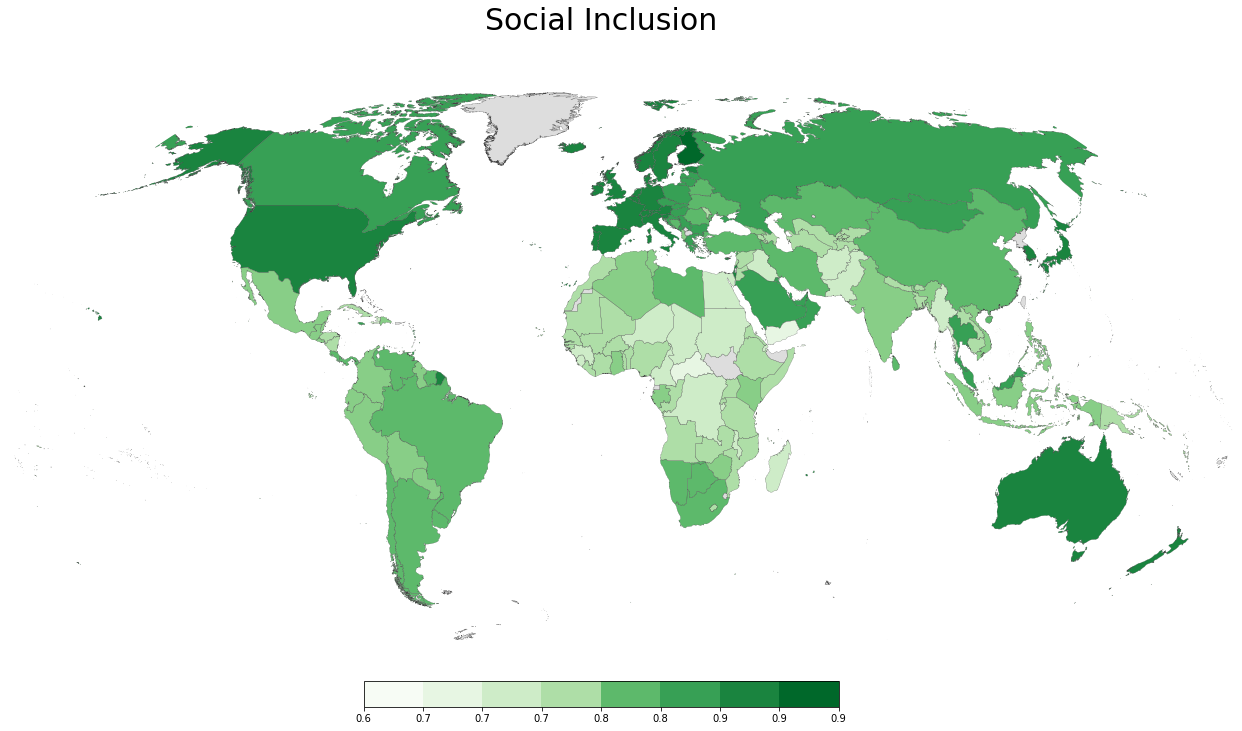

In [20]:
fig = plt.figure(figsize=(22, 12))

ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.suptitle(area2, fontsize=30, y=.95)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')

m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
for info, shape in zip(m.units_info, m.units):
    iso3 = info['ADM0_A3']
    if iso3 not in merged_data.index:
        color = '#dddddd'
    else:
        color = scheme[merged_data.loc[iso3]['bin']]

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)

# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

# Draw color legend.
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

# Set the map footer.
#plt.annotate(description, xy=(-.8, -3.2), size=14, xycoords='axes fraction')
plt.savefig('education_map.png')

